In [100]:
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [200]:
data = pd.read_csv('data.csv')

In [201]:
rmse = []
for participant in range(0, 9):
    group_indexes = data[data['participant_id'] == participant].groupby(['sound', 'channel']).groups.values()
    first_scores = []
    second_scores = []
    for index_pair in group_indexes:
        first_scores.append(data.loc[index_pair[0]]['score'])
        second_scores.append(data.loc[index_pair[1]]['score'])
    rmse.append(mean_squared_error(first_scores, second_scores, squared=False))

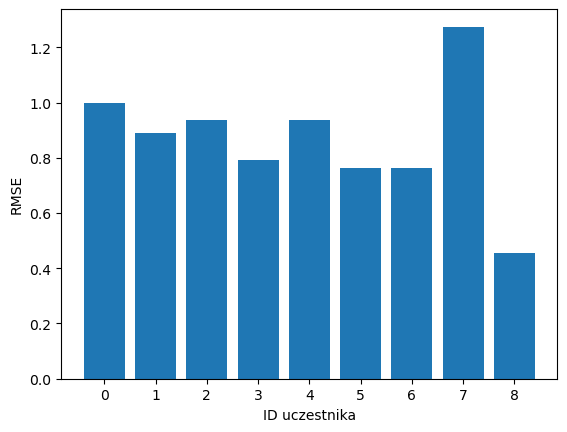

In [202]:
plt.bar(range(0, 9), rmse)
plt.xticks(range(0, 9))
plt.xlabel('ID uczestnika')
plt.ylabel('RMSE')
plt.savefig('rmse.png', dpi=400, format='png')
plt.show()

In [203]:
score_counts = []
for score in range(0, 7):
    length = len(data[data['score'] - 1 == score])
    score_counts.append(length)

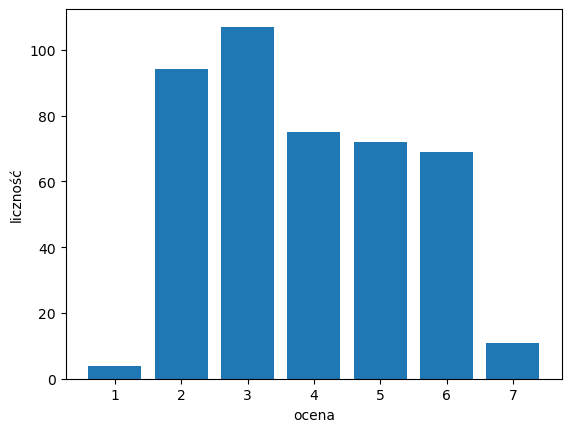

In [204]:
plt.bar(range(1, 8), score_counts)
plt.xticks(range(1, 8))
plt.xlabel('ocena')
plt.ylabel('liczność')
plt.savefig('ocena_histogram.png', dpi=400, format='png')
plt.show()

In [205]:
channels_to_angles = {
    1: '0°',
    3: '-45°',
    5: '-90°',
    7: '-135°',
    9: '180°',
    11: '135°',
    13: '90°',
    15: '45°'
}
angles = ['-180°', '-135°', '-90°', '-45°', '0°', '45°', '90°', '135°', '180°']

In [206]:
data['angle'] = data['channel'].map(channels_to_angles)

In [207]:
data = pd.concat([data, data[data['channel']==9].assign(angle='-180°')], ignore_index=True)

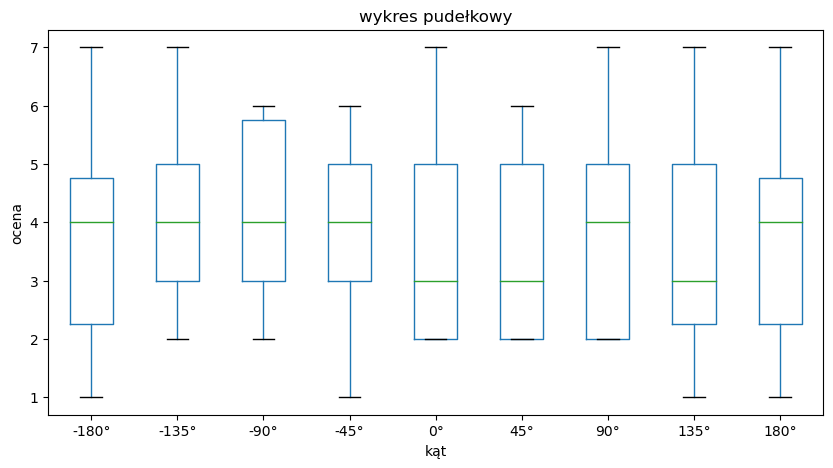

In [208]:
data.groupby('angle').boxplot(subplots=False, column='score', grid=False, figsize=(10,5), positions=[1, 0, 3, 2, 4, 7, 8, 5, 6])
plt.xticks(range(0, len(angles)), angles)
plt.xlabel('kąt')
plt.ylabel('ocena')
plt.title('wykres pudełkowy')
plt.savefig('boxplot.png', dpi=400, format='png')
plt.show()

In [215]:
angle_groups = data.groupby('angle').groups
means = []
intervals1 = []
intervals2 = []
for angle in angles:
    indexes = angle_groups[angle]
    angle_data = data.loc[indexes]
    mean = angle_data['score'].mean()
    intervals = st.t.interval(0.95, len(angle_data)-1, loc=mean, scale=st.sem(angle_data['score']))
    means.append(mean)
    intervals1.append(mean-intervals[0])
    intervals2.append(intervals[1]-mean)

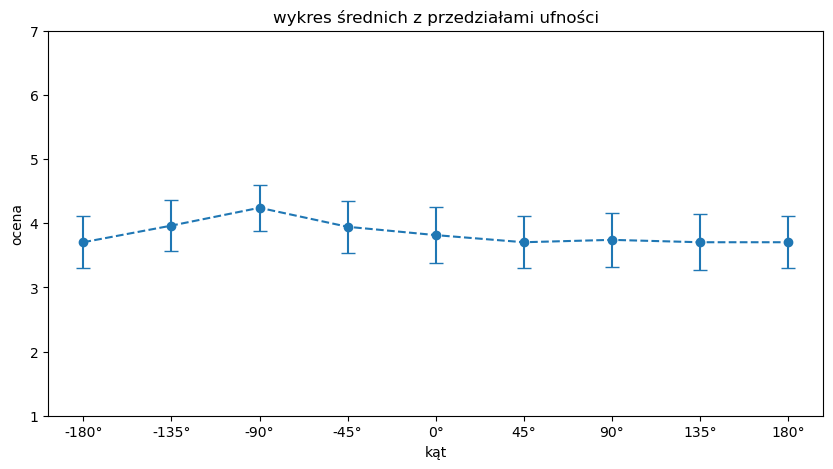

In [216]:
plt.figure(figsize=(10,5))
plt.errorbar(angles, means, [intervals1, intervals2], capsize=5, capthick=1, marker='o', fmt='--')
plt.yticks(range(1,8))
plt.xlabel('kąt')
plt.ylabel('ocena')
plt.title('wykres średnich z przedziałami ufności')
plt.savefig('means_ci.png', dpi=400, format='png')
plt.show()

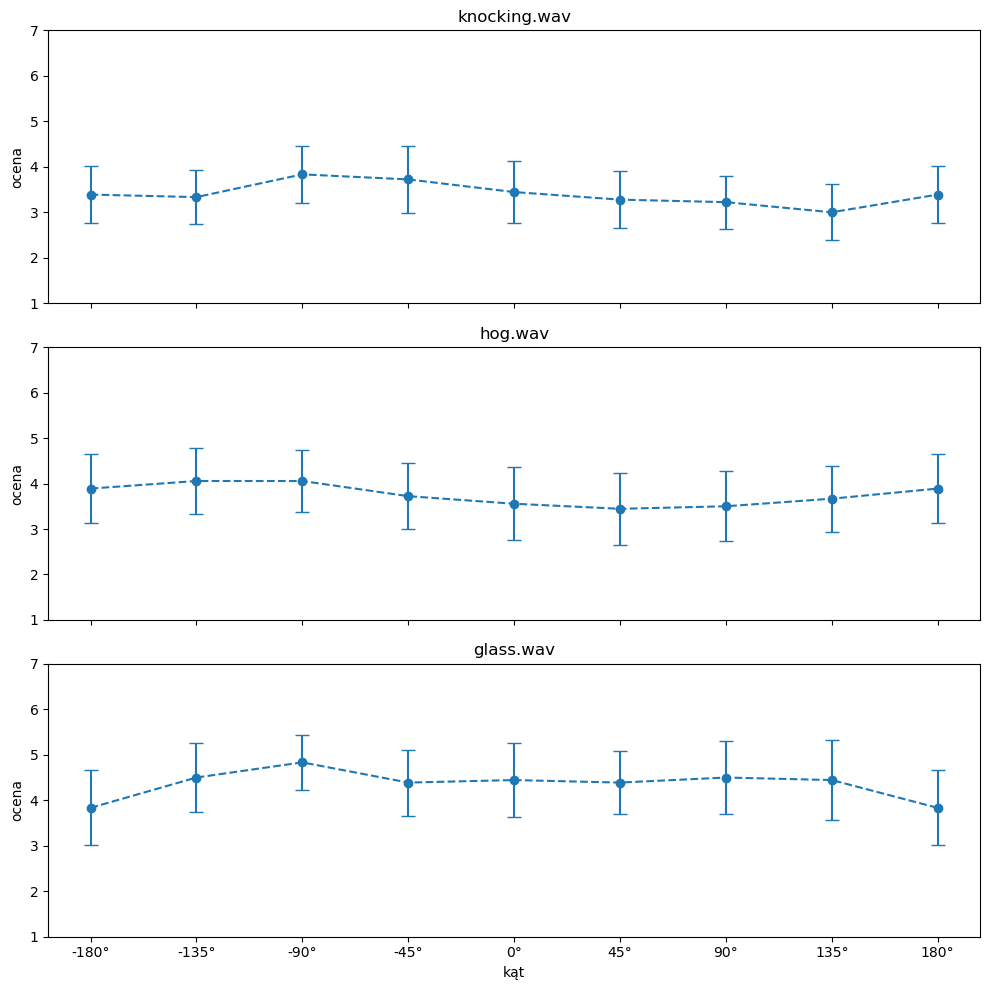

In [224]:
sounds = data['sound'].unique()
fig, ax = plt.subplots(len(sounds), figsize=(10,10), sharex=True)

for i, sound in enumerate(sounds):
    angle_groups = data[data['sound']==sound].groupby('angle').groups
    means = []
    intervals1 = []
    intervals2 = []
    for angle in angles:
        indexes = angle_groups[angle]
        angle_data = data.loc[indexes]
        mean = angle_data['score'].mean()
        intervals = st.t.interval(0.95, len(angle_data)-1, loc=mean, scale=st.sem(angle_data['score']))
        means.append(mean)
        intervals1.append(mean-intervals[0])
        intervals2.append(intervals[1]-mean)
    
    ax[i].errorbar(angles, means, [intervals1, intervals2], capsize=5, capthick=1, marker='o', fmt='--')
    ax[i].set_yticks(range(1,8))
    if i == len(sounds) - 1:
        ax[i].set_xlabel('kąt')
    ax[i].set_ylabel('ocena')
    ax[i].set_title(sound)

plt.tight_layout()
plt.savefig('means_ci_by_sounds.png', dpi=400, format='png')
plt.show()